In [1]:
# Script for training a denoiser
import os

os.environ['XLA_FLAGS']='--xla_gpu_cuda_data_dir=/gpfslocalsys/cuda/11.1.0'

In [2]:
%pylab inline
from astropy.io import fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
convergence = fits.getdata('../../data/ktng/ktng_kappa360v2.fits').astype('float32')

Import results on the validation map

In [6]:
sample = fits.getdata("./results/validation/samples_11.fits").astype(np.float32)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_22.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_33.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_44.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_55.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_66.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_77.fits").astype(np.float32)],
                       axis=0)
sample = np.concatenate([sample,
                   fits.getdata("./results/validation/samples_88.fits").astype(np.float32)],
                       axis=0)
sample.shape

(400, 360, 360)

Import results on the COSMOS field

In [7]:
cosmos = fits.getdata("./results/cosmos/samples_11.fits").astype(np.float32)

cosmos = np.concatenate([cosmos,
                   fits.getdata("./results/cosmos/samples_22.fits").astype(np.float32)],
                       axis=0)
cosmos = np.concatenate([cosmos,
                   fits.getdata("./results/cosmos/samples_33.fits").astype(np.float32)],
                       axis=0)
cosmos = np.concatenate([cosmos,
                   fits.getdata("./results/cosmos/samples_44.fits").astype(np.float32)],
                       axis=0)
cosmos = np.concatenate([cosmos,
                   fits.getdata("./results/cosmos/samples_55.fits").astype(np.float32)],
                       axis=0)
cosmos = np.concatenate([cosmos,
                   fits.getdata("./results/cosmos/samples_66.fits").astype(np.float32)],
                       axis=0)
cosmos.shape


(300, 360, 360)

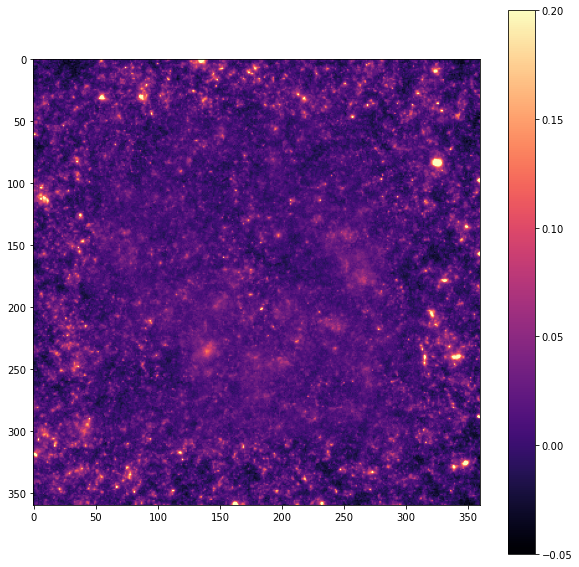

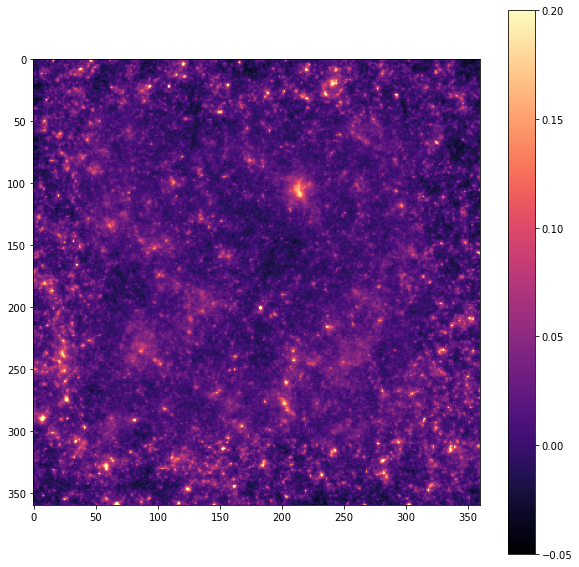

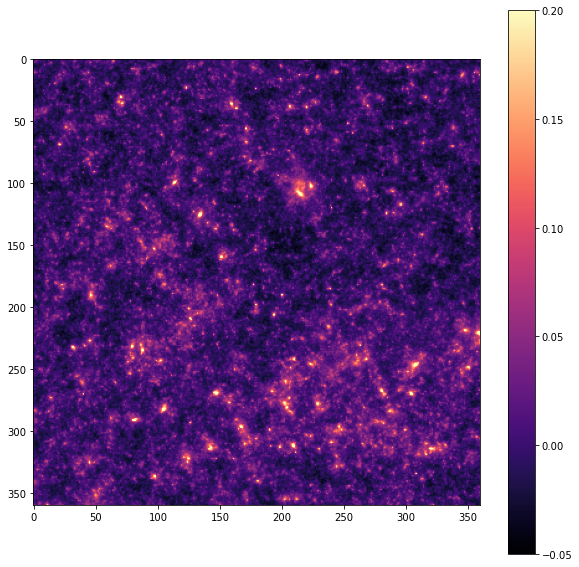

In [8]:
figure(figsize=(10,10))
imshow(cosmos[2,...], cmap='magma', vmin=-0.05, vmax=0.2)
colorbar()

figure(figsize=(10,10))
imshow(sample[0,...], cmap='magma', vmin=-0.05, vmax=0.2)
colorbar()

figure(figsize=(10,10))
imshow(convergence, cmap='magma', vmin=-0.05, vmax=0.2)
colorbar()

(100, 50000.0)

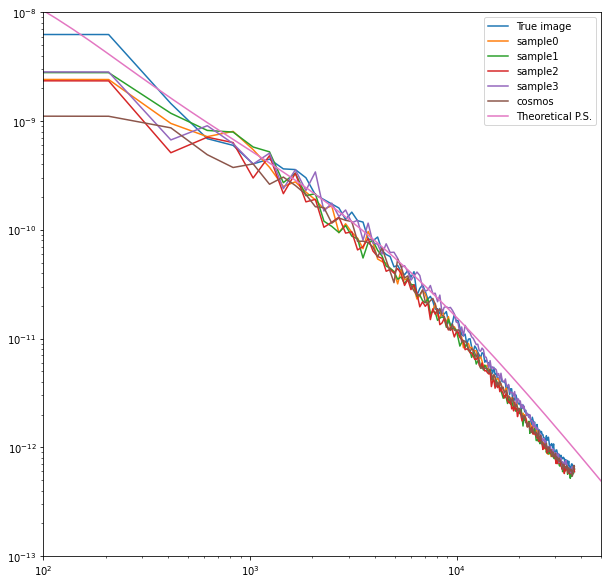

In [12]:
from jax_lensing.spectral import measure_power_spectrum
resolution = 0.29
pixel_size = np.pi * resolution / 180. / 60. #rad/pixel

figure(figsize=(10,10))

l_true, C_true = measure_power_spectrum(convergence, pixel_size)
loglog(l_true, C_true , label='True image')

l_f, C_f = measure_power_spectrum(sample[0,...], pixel_size)
loglog(l_f, C_f,label='sample0')
l_f, C_f = measure_power_spectrum(sample[1,...], pixel_size)
loglog(l_f, C_f,label='sample1')
l_f, C_f = measure_power_spectrum(sample[2,...], pixel_size)
loglog(l_f, C_f,label='sample2')
l_f, C_f = measure_power_spectrum(sample[3,...], pixel_size)
loglog(l_f, C_f,label='sample3')

l_f, C_f = measure_power_spectrum(cosmos[0,...], pixel_size)
loglog(l_f, C_f,label='cosmos')

gaussian_path = "../../data/ktng/ktng_PS_theory.npy"
ps_data_th = np.load(gaussian_path).astype('float32')
loglog(ps_data_th[0,:], ps_data_th[1,:], label='Theoretical P.S.')

legend()
ylim(1.e-13,1e-8)
xlim(100,5e4)

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# These show the borders of the cosmos field
COSMOS_VERTICES = [(149.508, 2.880),
                   (149.767, 2.836),
                   (149.780, 2.887),
                   (150.040, 2.842),
                   (150.051, 2.893),
                   (150.363, 2.840),
                   (150.376, 2.890),
                   (150.746, 2.826),
                   (150.737, 2.774),
                   (150.790, 2.765),
                   (150.734, 2.449),
                   (150.787, 2.441),
                   (150.730, 2.125),
                   (150.785, 2.118),
                   (150.758, 2.013),
                   (150.768, 2.010),
                   (150.747, 1.910),
                   (150.799, 1.897),
                   (150.740, 1.580),
                   (150.481, 1.625),
                   (150.466, 1.572),
                   (150.211, 1.619),
                   (150.196, 1.567),
                   (149.887, 1.621),
                   (149.872, 1.571),
                   (149.617, 1.615),
                   (149.602, 1.566),
                   (149.493, 1.584),
                   (149.504, 1.637),
                   (149.450, 1.646),
                   (149.488, 1.855),
                   (149.433, 1.862),
                   (149.491, 2.178),
                   (149.436, 2.186),
                   (149.484, 2.445),
                   (149.431, 2.455),
                   (149.508, 2.880)]

from lenspack.geometry.projections import gnom
def get_extend_radec(res, width):
    ra0, dec0 = (150.11, 2.24) # from cosmos.astro.caltech.edu (could also just use the medians of positions)
    proj = gnom.projector(ra0, dec0)
    pix_size = res #arcmin
    dx = np.deg2rad(width*pix_size/60./2) # number of degrees across
    dy = dx
    extent_xy = [-dx, dx, -dy, dy]
    ra_min, dec_min = proj.xy2radec(-dx, -dy)
    ra_max, dec_max = proj.xy2radec(dx, dy)
    extent_radec = [ra_min, ra_max, dec_min, dec_max]
    return extent_radec

In [15]:
samples = sample

## Point estimate

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/tensorflow-gpu-2.5.0/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


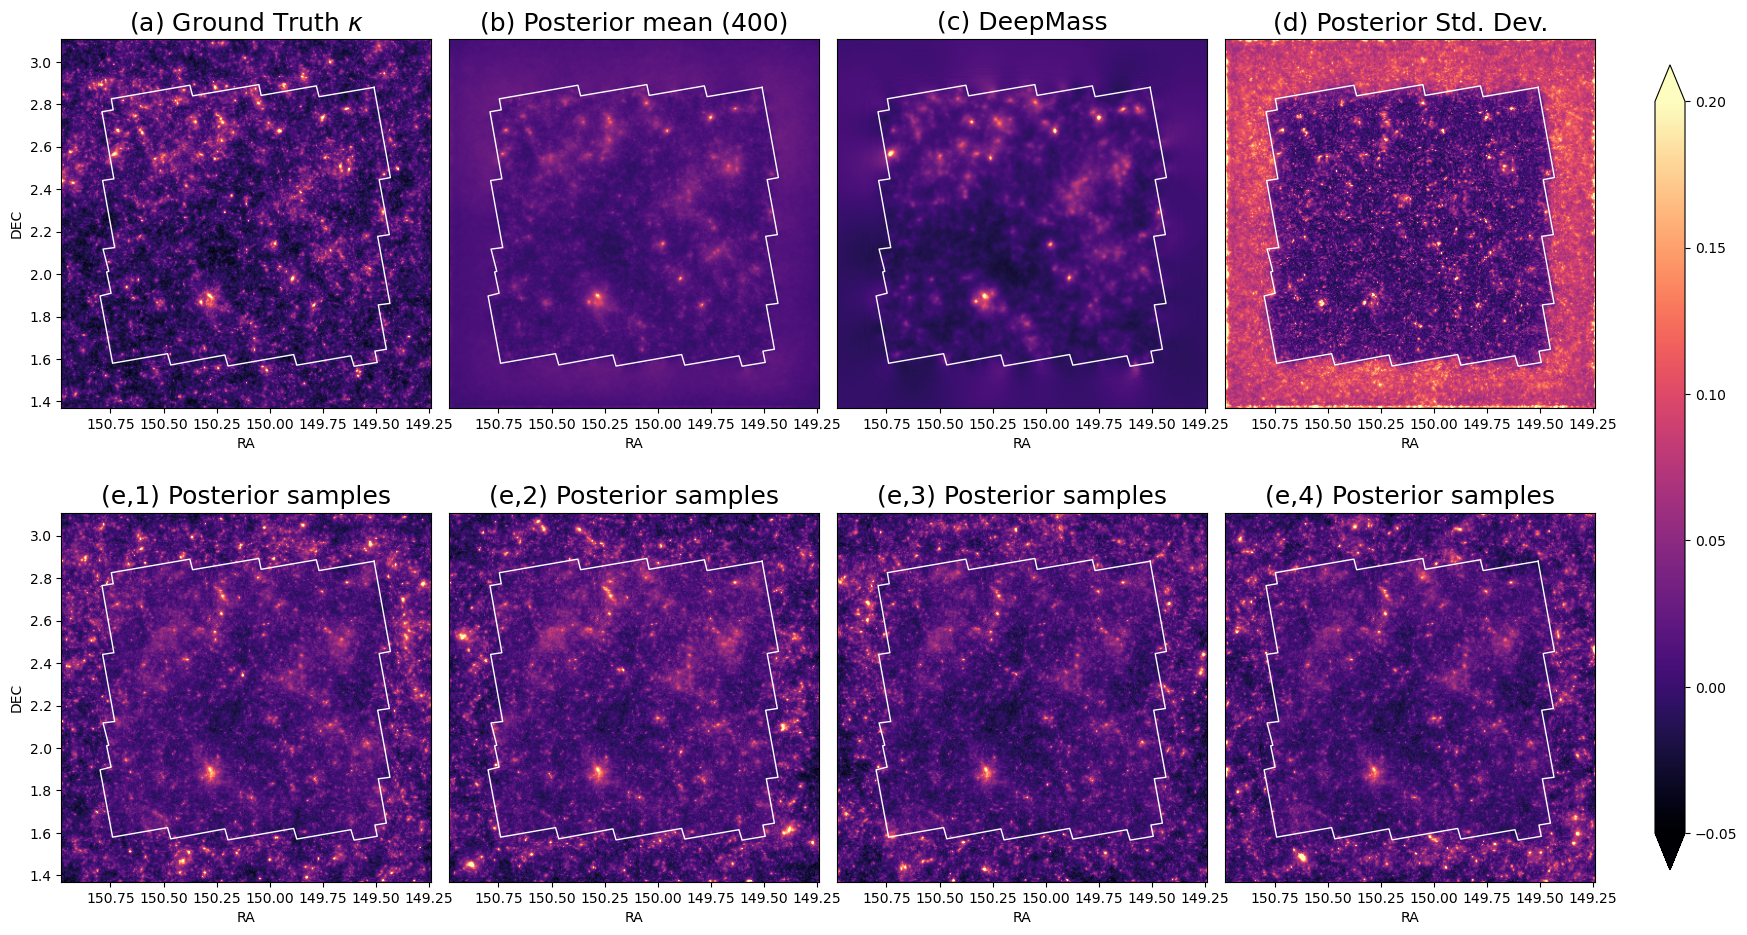

In [49]:
width = 360
resolution = 0.29

vmin = -0.05
vmax = 0.2

f, axes = plt.subplots(2, 4, sharey=False, figsize=(20,11.5), dpi=100)

# Ground truth
im=axes[0,0].imshow(convergence, origin='lower', cmap='magma', extent=get_extend_radec(resolution, width), aspect="auto", vmin=vmin, vmax=vmax)
axes[0,0].invert_xaxis()
#axes[0,0].set_xlim(axes[0].gca().get_xlim()[::-1])
#axes[0,0].invert_yaxis()
ra, dec = np.array(COSMOS_VERTICES).T
axes[0,0].plot(ra, dec,  c='w', lw=1)
axes[0,0].set_aspect('equal')
axes[0,0].set_xlabel('RA')
axes[0,0].set_ylabel('DEC')
axes[0,0].set_title(r'(a) Ground Truth $\kappa$', fontsize=18)
divider = make_axes_locatable(axes[0,0])
#cax = divider.append_axes("right", size="5%", pad=0.)
#f.colorbar(im, cax=cax)

# Gaussian denosier
post_mean = samples[...].mean(axis=0).reshape(360,360)

#np.save('results/posterior_mean_nsm_validation.npy', post_mean)
im = axes[0,1].imshow(post_mean, origin='lower', cmap='magma', extent=get_extend_radec(resolution, width), aspect="auto", vmin=vmin, vmax=vmax)
axes[0,1].invert_xaxis()
#axes[1].set_xlim(axes[0].gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
axes[0,1].plot(ra, dec,  c='w', lw=1)
axes[0,1].set_aspect('equal')
axes[0,1].set_xlabel('RA')
axes[0,1].get_yaxis().set_ticks([])
#axes[1].set_ylabel('dec')
axes[0,1].set_title('(b) Posterior mean ({})'.format(samples.shape[0]), fontsize=18)
divider = make_axes_locatable(axes[0,1])
#cax = divider.append_axes("right", size="5%", pad=0.)
#f.colorbar(im, cax=cax)

#np.save('results/deepmass_validation.npy', deepmass)
# Gaussian + Denoising Auto Encoder denoiser
deepmass = np.load('./results/kappa_deepmassv2.npy')
im = axes[0,2].imshow(deepmass, origin='lower', cmap='magma', extent=get_extend_radec(resolution, width), aspect="auto", vmin=vmin, vmax=vmax)
axes[0,2].invert_xaxis()
#axes[1].set_xlim(axes[0].gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
axes[0,2].plot(ra, dec,  c='w', lw=1)
axes[0,2].set_aspect('equal')
axes[0,2].set_xlabel('RA')
axes[0,2].get_yaxis().set_ticks([])
#axes[1].set_ylabel('dec')
axes[0,2].set_title('(c) DeepMass', fontsize=18)
divider = make_axes_locatable(axes[0,2])
#cax = divider.append_axes("right", size="5%", pad=0.)
#f.colorbar(im, cax=cax)

# DAE output
im = axes[0,3].imshow(samples[:,...].std(0), origin='lower', cmap='magma',
                      extent=get_extend_radec(resolution, width),
                      aspect="auto", vmin=0., vmax=0.05)
axes[0,3].invert_xaxis()
#axes[1].set_xlim(axes[0].gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
axes[0,3].plot(ra, dec,  c='w', lw=1)
axes[0,3].set_aspect('equal')
axes[0,3].set_xlabel('RA')
axes[0,3].get_yaxis().set_ticks([])
#axes[3].set_ylabel('dec')
axes[0,3].set_title('(d) Posterior Std. Dev.', fontsize=18)
divider = make_axes_locatable(axes[0,3])
#cax = divider.append_axes("right", size="5%", pad=0.0)
#f.colorbar(im, cax=cax)

for i in range(4):
    # Gaussian denosier
    im = axes[1,i].imshow(sample[i*10,...].reshape(360,360), origin='lower', cmap='magma', extent=get_extend_radec(resolution, width), aspect="auto", vmin=vmin, vmax=vmax)
    axes[1,i].invert_xaxis()
    #axes[1].set_xlim(axes[0].gca().get_xlim()[::-1])
    ra, dec = np.array(COSMOS_VERTICES).T
    axes[1,i].plot(ra, dec,  c='w', lw=1)
    axes[1,i].set_aspect('equal')
    axes[1,i].set_xlabel('RA')
    if i==0:
        axes[1,i].set_ylabel('DEC')
    else:
        axes[1,i].get_yaxis().set_ticks([])
    axes[1,i].set_title('(e,{}) Posterior samples'.format(i+1), fontsize=18)
    divider = make_axes_locatable(axes[1,i])
    #cax = divider.append_axes("right", size="5%", pad=0.)
    #f.colorbar(im, cax=cax)
#f.colorbar(im, ax=axes.ravel().tolist())

cbar_ax = f.add_axes([.83, 0.15, 0.015, 0.7])
f.colorbar(im, cax=cbar_ax, extend='both')

#plt.colorbar(gt)
#"""
f.tight_layout()

f.subplots_adjust(wspace=0.05, hspace=-0.25, right=0.8)
#"""
#ax=axes.ravel().tolist())
#savefig('gauss-res-0.284.pdf')
savefig('plots/validation-comparison.pdf')

In [22]:
def rmse(a, b, mask):
    return(np.sqrt(np.sum(mask*(a-b)*(a-b))/np.sum(mask)))

mask = fits.getdata('../../data/COSMOS/cosmos_full_mask_0.29arcmin360copy.fits').astype('float32')
print('Posterior Mean:', "{:.2e}".format(rmse(convergence, samples[:,...].mean(0).reshape(360,360), mask)))

def r(a, b, mask):
    return np.cov(mask*a, mask*b)[0,1]/np.std(mask*a)/np.std(mask*b)

pm = samples[:,...].mean(0)
print('Posterior mean', r(convergence.flatten(), pm.flatten(), mask.flatten()))

Posterior Mean: 2.04e-02
Posterior mean 0.7632014798375168


## Power spectrum

In [23]:
import jax
from jax_lensing.spectral import measure_power_spectrum
resolution = 0.29
pixel_size = np.pi * resolution / 180. / 60. #rad/pixel

wiener = np.load('results/gaussian_samples.npy')

mps = jax.vmap(measure_power_spectrum, in_axes=[0,None])
ell_post, cl_post = mps(samples, pixel_size)
cl_post_mean = cl_post.mean(0)
cl_post_std = cl_post.std(0)

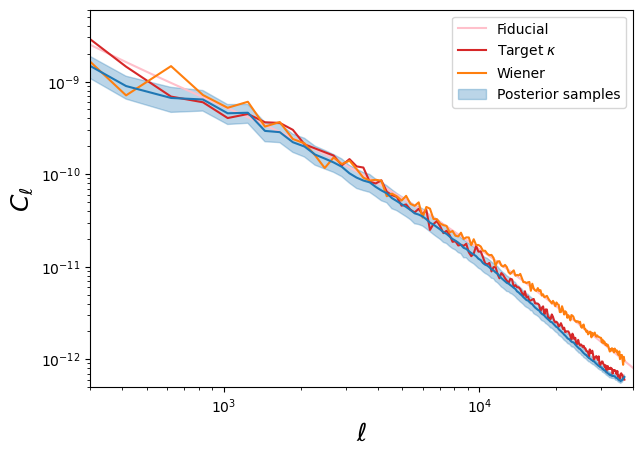

In [48]:
figure(figsize=(7,5), dpi=100)

kwargs = dict(linewidth=1.5)

plot(ps_data_th[0,:], ps_data_th[1,:], color='pink', label='Fiducial', **kwargs)

l_true, C_true = measure_power_spectrum(convergence, pixel_size)
loglog(l_true, C_true, color='tab:red', label=r'Target $\kappa$', **kwargs)

l_true, C_true = measure_power_spectrum(wiener[0,...], pixel_size)
loglog(l_true, C_true, color='tab:orange', label='Wiener', **kwargs)

plot(ell_post[0,...], cl_post_mean, color='tab:blue', **kwargs)
fill_between(ell_post[0,...], cl_post_mean-cl_post_std,
             cl_post_mean+cl_post_std, color='tab:blue' ,alpha=0.3, label='Posterior samples')

legend()
ylim(5.e-13,6e-9)
xlim(300,4e4)
xscale('log')
yscale('log')
ylabel(r'$C_\ell$', fontsize=18)
xlabel(r'$\ell$', fontsize=18)

savefig('plots/ps-ODE-comparison-1.pdf')

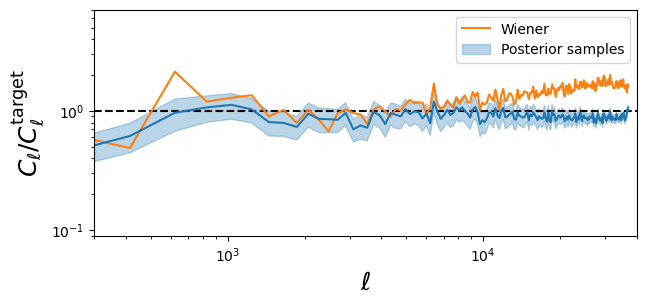

In [47]:
figure(figsize=(7,3), dpi=100)

kwargs = dict(linewidth=1.5)

hlines(y=1., xmin=300,xmax=4e4, linestyle='--', color='k')

l_true, C_true = measure_power_spectrum(convergence, pixel_size)

l_true, C_wiener = measure_power_spectrum(wiener[0,...], pixel_size)
plot(l_true, C_wiener/C_true, color='tab:orange', label='Wiener', **kwargs)


ell_post, cl_post = mps(samples, pixel_size)
mean = (cl_post/C_true).mean(0)
std = (cl_post/C_true).std(0)
plot(l_true, mean, color='tab:blue', **kwargs)
fill_between(l_true, mean-std,
             mean+std, color='tab:blue' ,alpha=0.3, label='Posterior samples')

legend()
#ylim(5.e-13,6e-9)
xlim(300,4e4)
xscale('log')
yscale('log')
ylabel(r'$C_\ell/C_\ell^\mathrm{target}$', fontsize=18)
xlabel(r'$\ell$', fontsize=18)
savefig('plots/ps-ODE-comparison-2.pdf')

## COSMOS

In [27]:
mps = jax.vmap(measure_power_spectrum, in_axes=[0,None])
ell_cosmos, cl_cosmos = mps(cosmos, pixel_size)
cl_cosmos_mean = cl_cosmos.mean(0)
cl_cosmos_std = cl_cosmos.std(0)

In [35]:
from jax_lensing.utils import load_dataset
dataset = "kappatng"
batch_size = 100
map_size=360
noise_dist_std=.1
train_split='90%'
train_set = load_dataset(dataset,
                         batch_size,
                         map_size,
                         noise_dist_std,
                         train_split)
batch = next(train_set)

In [36]:
mps = jax.vmap(measure_power_spectrum, in_axes=[0,None])
ell_data, cl_data = mps(batch['x'][...,0], pixel_size)
cl_data_mean = cl_data.mean(0)
cl_data_std = cl_data.std(0)

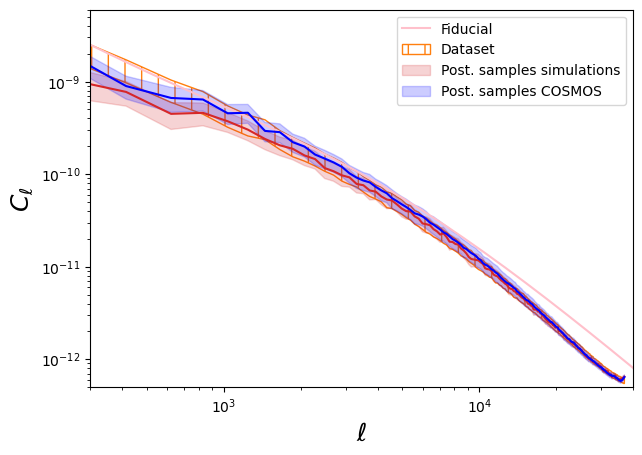

In [46]:
figure(figsize=(7,5), dpi=100)

kwargs = dict(linewidth=1.5)

plot(ps_data_th[0,:], ps_data_th[1,:], color='pink', label='Fiducial', **kwargs)

#plot(ell_data[0,...], cl_data_mean, color='k', **kwargs)
fill_between(ell_data[0,...], cl_data_mean-cl_cosmos_std,
             cl_data_mean+cl_data_std, color='tab:orange', fc='None', hatch='|',alpha=1., label='Dataset')

plot(ell_cosmos[0,...], cl_cosmos_mean, color='tab:red', **kwargs)
fill_between(ell_cosmos[0,...], cl_cosmos_mean-cl_cosmos_std,
             cl_cosmos_mean+cl_cosmos_std, color='tab:red' ,alpha=0.2, label='Post. samples simulations')

plot(ell_post[0,...], cl_post_mean, color='blue', **kwargs)
fill_between(ell_post[0,...], cl_post_mean-cl_post_std,
             cl_post_mean+cl_post_std, color='blue' ,alpha=0.2, label='Post. samples COSMOS')


legend()
ylim(5.e-13,6e-9)
xlim(300,4e4)
xscale('log')
yscale('log')
ylabel(r'$C_\ell$', fontsize=18)
xlabel(r'$\ell$', fontsize=18)

savefig('plots/ps-ODE-comparison-cosmos.pdf')

In [40]:
ks_cosmos = fits.getdata('../../data/COSMOS/ks_e_0.29arcmin360.fits')

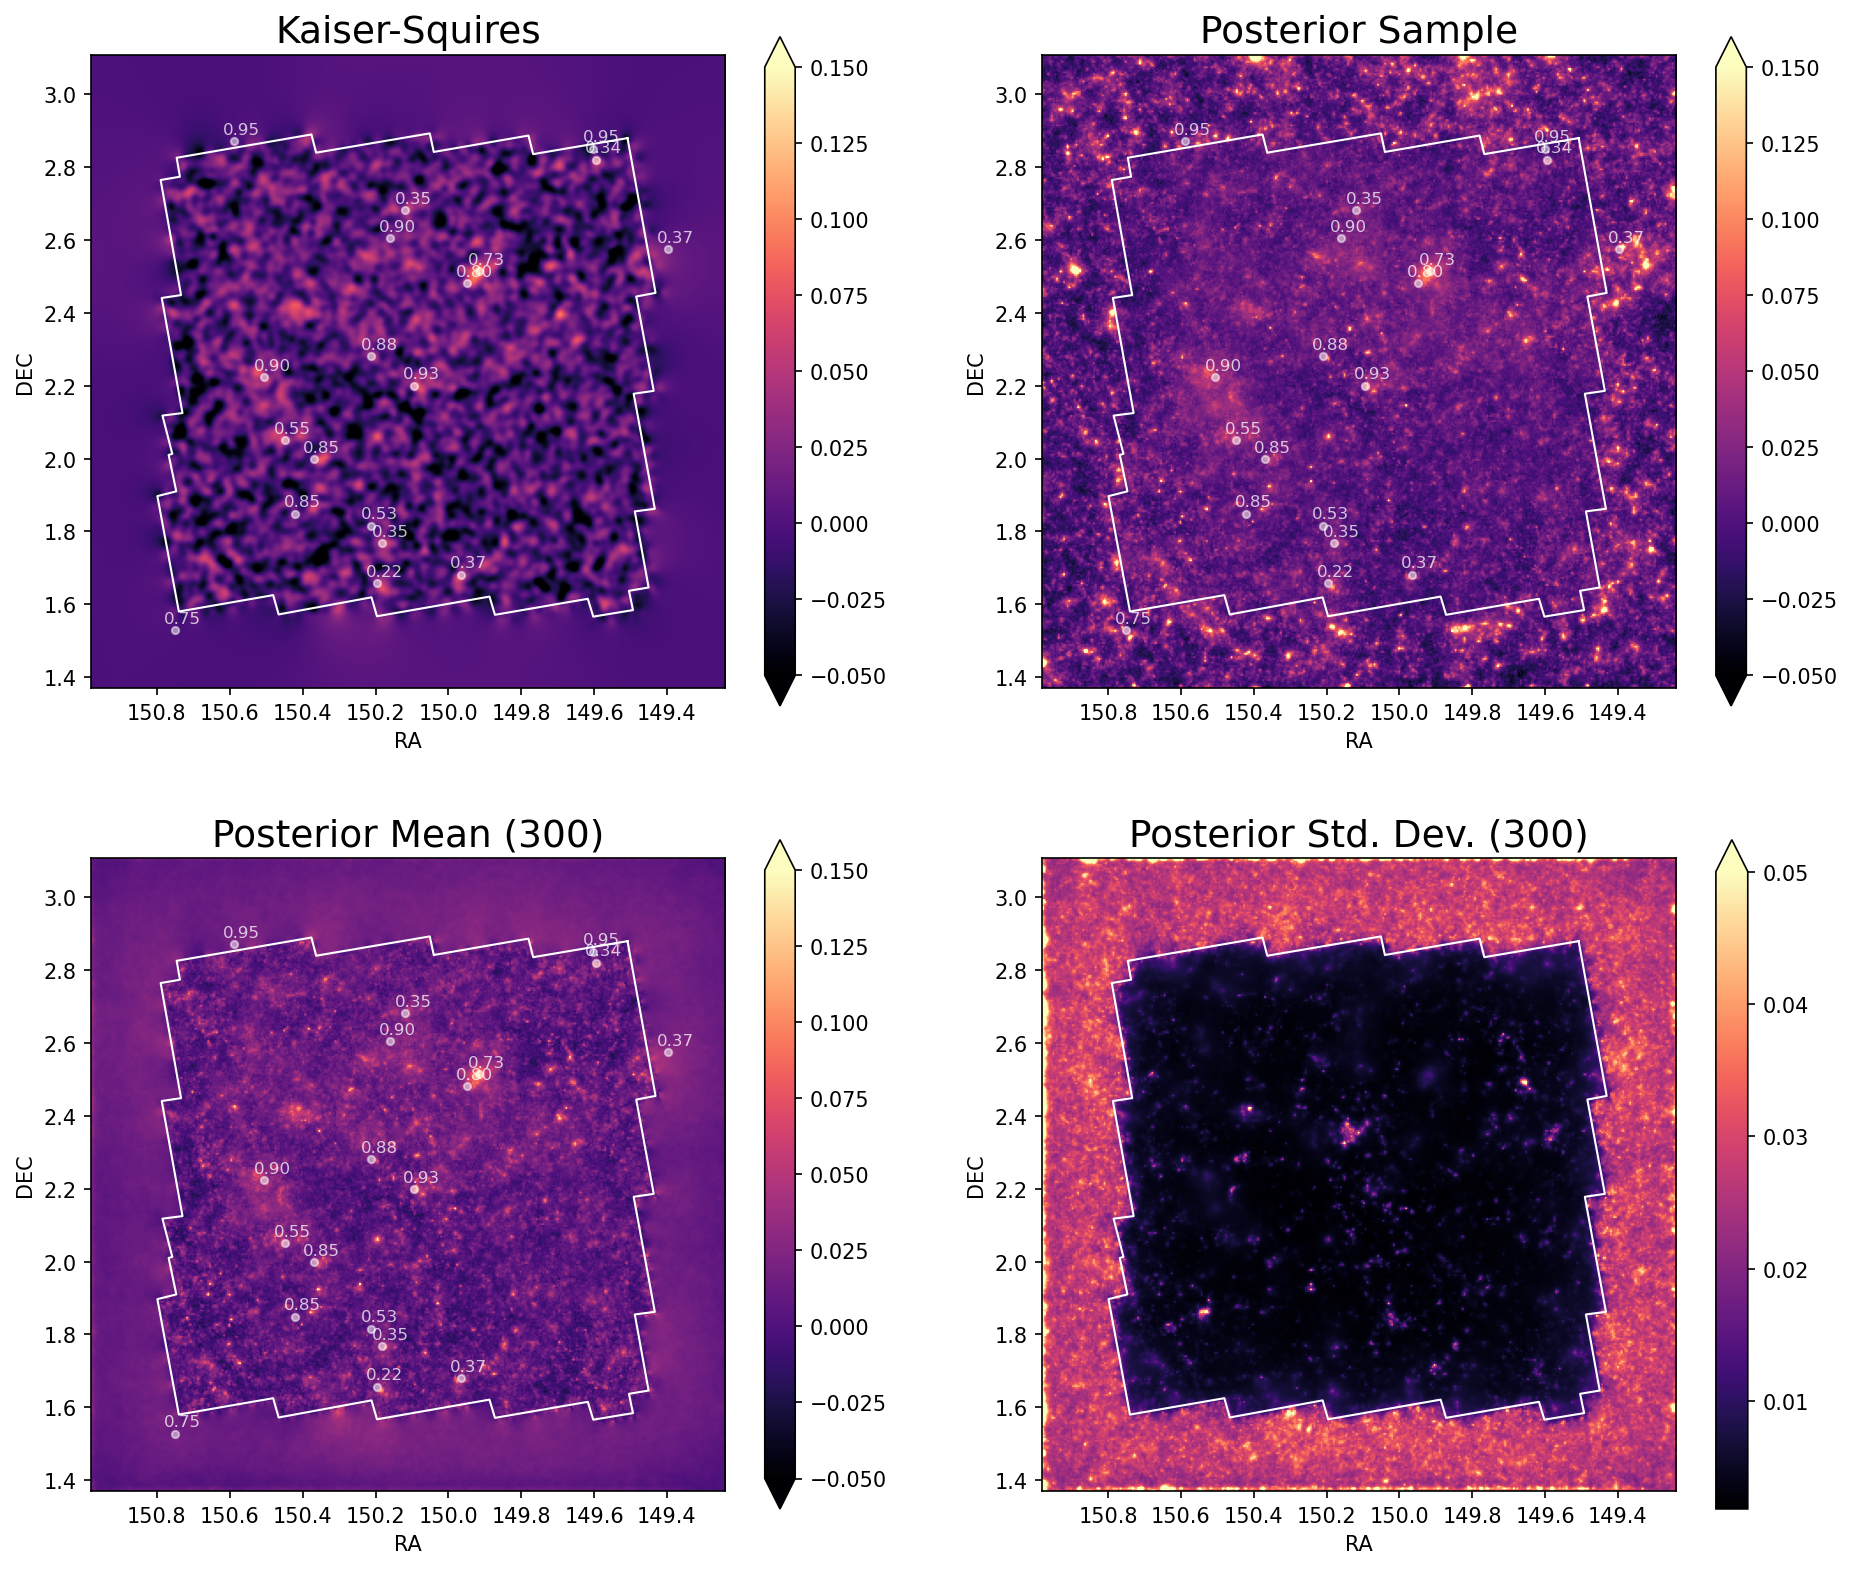

In [53]:
resolution = 0.29
width = 360

kwargs = dict(cmap='magma', origin='lower', extent=get_extend_radec(resolution, width), vmin=-.05, vmax=0.15)

figure(figsize=[15,13], dpi=150)

subplot(221)
imshow(ks_cosmos[:,::-1],**kwargs)
colorbar(extend='both')
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('RA')
ylabel('DEC')
title(r'Kaiser-Squires', fontsize=18)

xclusters = np.loadtxt("../../data/xray.txt")
m500min=3
zmin=0.1
zmax=0.99
highz = (xclusters[:, 6] >= zmin) & (xclusters[:, 6] <= zmax)
for cluster in xclusters[highz]:
    ra_cl, dec_cl, z_cl = cluster[1], cluster[2], cluster[6]
    m500 = cluster[7]
    if m500 > m500min:
        scatter(ra_cl, dec_cl, c='w', s=12, alpha=.5)
        text(ra_cl + 0.03, dec_cl + 0.02, "{:.2f}".format(z_cl), fontsize=8, color='w', alpha=.75)


subplot(223)
imshow(cosmos[:,...].mean(axis=0).reshape(360,360),**kwargs)
colorbar(extend='both')
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('RA')
ylabel('DEC')
title('Posterior Mean ({})'.format(cosmos.shape[0]), fontsize=18)

xclusters = np.loadtxt("../../data/xray.txt")
m500min=3
zmin=0.1
zmax=0.99
highz = (xclusters[:, 6] >= zmin) & (xclusters[:, 6] <= zmax)
for cluster in xclusters[highz]:
    ra_cl, dec_cl, z_cl = cluster[1], cluster[2], cluster[6]
    m500 = cluster[7]
    if m500 > m500min:
        scatter(ra_cl, dec_cl, c='w', s=12, alpha=.5)
        text(ra_cl + 0.03, dec_cl + 0.02, "{:.2f}".format(z_cl), fontsize=8, color='w', alpha=.75)
        

subplot(222)
imshow(cosmos[1,...].reshape(360,360), **kwargs)
colorbar(extend='both')
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('RA')
ylabel('DEC')
title('Posterior Sample', fontsize=18)

xclusters = np.loadtxt("../../data/xray.txt")
m500min=3
zmin=0.1
zmax=0.99
highz = (xclusters[:, 6] >= zmin) & (xclusters[:, 6] <= zmax)
for cluster in xclusters[highz]:
    ra_cl, dec_cl, z_cl = cluster[1], cluster[2], cluster[6]
    m500 = cluster[7]
    if m500 > m500min:
        scatter(ra_cl, dec_cl, c='w', s=12, alpha=.5)
        text(ra_cl + 0.03, dec_cl + 0.02, "{:.2f}".format(z_cl), fontsize=8, color='w', alpha=.75)
        
subplot(224)
imshow(cosmos[:,...].std(axis=0).reshape(360,360), cmap='magma', origin='lower', extent=get_extend_radec(resolution, width),
      vmax=.05)
colorbar(extend='max')
xlim(gca().get_xlim()[::-1])
ra, dec = np.array(COSMOS_VERTICES).T
plot(ra, dec,  c='w', lw=1)
xlabel('RA')
ylabel('DEC')
title('Posterior Std. Dev. ({})'.format(cosmos.shape[0]), fontsize=18)

        
savefig('plots/COSMOS-figure-ODE.pdf')